# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "BostonHousing"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
# AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)

# Run Time

In [3]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
# print("DUREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)))
# print("UNREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 1.22| Max: 1.37
DUREAL 0.015 Time (minutes): Mean: 8.44| Max: 25.88
UNREAL 0.015 Time (minutes): Mean: 8.41| Max: 26.23


# Error Vec

(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

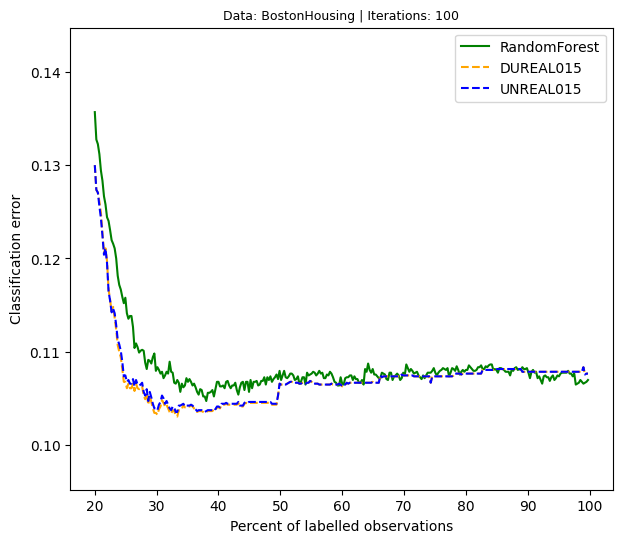

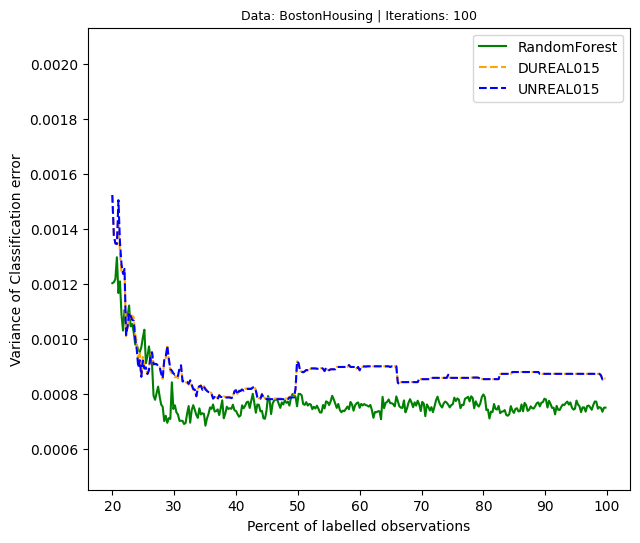

In [4]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL025": "green",
    "UNREAL025": "yellow"
}

linestyles = {
    "DUREAL015": "dashed",
    "UNREAL015": "dashed",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

### Figure ##
MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL025 = AnalyzedData025["Error_DUREAL"],
                #  UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 CriticalValue = 1.96)

# Selection History

In [5]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)

In [6]:
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()

,AverageRank,CRIM_1,CRIM_2,CRIM_3,NOX_1,NOX_2,NOX_3,RM_1,RM_2,RM_3,PTRATIO_1,PTRATIO_2,PTRATIO_3,LSTAT_1,LSTAT_2,LSTAT_3,Y
266,7.971014,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
63,10.059701,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,True
314,11.383333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,False
305,11.534483,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,True
308,11.876923,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,False


In [7]:
SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()

,AverageRank,CRIM_1,CRIM_2,CRIM_3,NOX_1,NOX_2,NOX_3,RM_1,RM_2,RM_3,PTRATIO_1,PTRATIO_2,PTRATIO_3,LSTAT_1,LSTAT_2,LSTAT_3,Y
266,8.985507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
314,11.350000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,False
308,19.646154,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,False
63,21.462687,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,True
137,24.600000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,False


In [8]:
SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

,AverageRank,CRIM_1,CRIM_2,CRIM_3,NOX_1,NOX_2,NOX_3,RM_1,RM_2,RM_3,PTRATIO_1,PTRATIO_2,PTRATIO_3,LSTAT_1,LSTAT_2,LSTAT_3,Y
266,9.130435,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,True
314,11.516667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,False
308,20.123077,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,False
63,22.552239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,True
137,24.266667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,False
